<a href="https://colab.research.google.com/github/rahulsm27/ML/blob/main/Pytorch_Practicse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chapter 1 # INTRO

In [ ]:
import torch
print (torch.__version__)
print (torch.cuda.is_available())

2.0.1+cu118
False


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

import urllib.request
url = "https://pytorch.tips/coffee"
fpath = 'coffee.jpg'

urllib.request.urlretrieve(url,fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x7e7ea83b5090>)

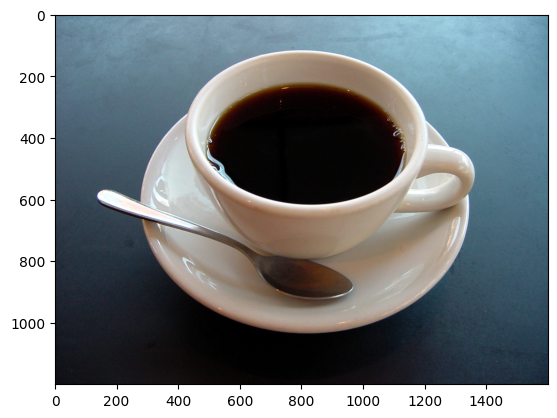

In [ ]:
img = Image.open('coffee.jpg')
plt.imshow(img)

In [ ]:
from torchvision import transforms

In [ ]:
transform = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize(0,1)])

In [ ]:
img_tensor = transform(img)

In [ ]:
img_tensor.shape

torch.Size([3, 224, 298])

In [ ]:
img_tensor.size()

torch.Size([3, 224, 298])

In [ ]:
batch = img_tensor.unsqueeze(0) # to add a dimesnion for batch

In [ ]:
batch.size()

torch.Size([1, 3, 224, 298])

In [ ]:
from torchvision import models
model = models.alexnet(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 196MB/s]


In [ ]:
model.eval()
model.to(device)
batch.to(device)
y = model(batch)
print(y.shape)

torch.Size([1, 1000])


In [ ]:
y_max, index = torch.max(y,1)
print(y_max.item())
print(index.item())

13.605668067932129
666


In [ ]:
import torch.nn.functional as F

prob = F.softmax(y,dim=1)

In [ ]:
print(prob[0][index.item()])

tensor(0.2973, grad_fn=<SelectBackward0>)


In [ ]:
# Chapter 2 Tensors

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])

In [ ]:
x.size()

torch.Size([2, 3])

In [ ]:
x.device

device(type='cpu')

In [ ]:
x.dtype

torch.int64

In [ ]:
x.to(device)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x.device

device(type='cpu')

In [ ]:
torch.rand(2,5) # 0 to 1 of size 2,5


tensor([[0.6314, 0.5920, 0.3966, 0.9118, 0.8428],
        [0.7022, 0.7461, 0.7710, 0.7977, 0.4566]])

In [ ]:
torch.randn(2,5) # mean 0 and std 1 of size 2,5

tensor([[ 1.1353, -0.6049, -1.7306,  0.4471, -0.4469],
        [ 1.6448,  1.0792, -1.1803, -1.3944,  0.5702]])

In [ ]:

torch.randint(1,100,(2,5)) # int bet 1 to 100 of size 2,5

tensor([[64,  4, 24, 29, 70],
        [ 8, 39, 28, 71, 90]])

In [ ]:
x = torch.rand(2,5)
w = torch.empty_like(x)
print(w)

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31, 7.2708e+31],
        [5.0778e+31, 3.2608e-12, 1.7728e+28, 7.0367e+22, 2.1715e-18]])


In [ ]:
torch.rand_like(x)

tensor([[0.7155, 0.6909, 0.8495, 0.0606, 0.5867],
        [0.2023, 0.8589, 0.5393, 0.7387, 0.1411]])

In [ ]:
# From numpy

In [ ]:
import numpy as np
x =np.random.rand(2,5)

In [ ]:
y = torch.tensor(x)

In [ ]:
y[:2,1].numpy()

array([0.94548881, 0.43816276])

In [ ]:
y.numpy()

array([[0.75934145, 0.94548881, 0.5692409 , 0.06730949, 0.45264587],
       [0.46478355, 0.43816276, 0.97939765, 0.88433735, 0.5054619 ]])

In [ ]:
y[1,1].item() # use item for scalar values only..

0.4381627589303896

In [ ]:
# view is used for reshaping instead of reshape...reshape may copy view ensures is
y = torch.randn(2,5)
print(y)

tensor([[ 0.9224,  0.5987,  0.5298, -2.9208,  1.7676],
        [-1.2132, -0.4242,  0.4304, -0.6598, -0.1941]])


In [ ]:
y.view((5,2))

tensor([[ 0.3955,  0.8540],
        [-0.0492, -0.8079],
        [-0.6629, -1.1409],
        [ 1.3027, -0.4531],
        [ 0.1400, -0.0558]])

In [ ]:
torch.add(y,2)

tensor([[ 2.9224,  2.5987,  2.5298, -0.9208,  3.7676],
        [ 0.7868,  1.5758,  2.4304,  1.3402,  1.8059]])

In [ ]:
x = torch.randn(2,3)
y = torch.randn(2,3)

torch.add(x,y)

tensor([[ 0.3775,  1.4579,  1.3878],
        [-3.4797,  2.1921,  0.5433]])

In [ ]:
torch.mul(x,y)

tensor([[-0.1210,  0.5265, -2.0051],
        [ 2.9870,  0.0170,  0.0522]])

In [ ]:
torch.mul(x,3)

tensor([[ 1.7537,  2.3948,  6.8123],
        [-4.6195,  0.0233,  1.2561]])

In [ ]:
# Custom Dataset class

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from torch.utils.data import Dataset

In [67]:
import os
import cv2
class CustomDatset(Dataset):
  def __init__(self,imagedir,typeof):
    self.imagedir = imagedir
    self.typeof = typeof
    self.labels = []
    self.imagepath = []
    _path = os.path.join(imagedir,typeof)
    for i in os.listdir(_path):
      _classpath = os.path.join(_path,i)
      _imagepath = os.listdir(_classpath)
      _imagepath = [(_classpath + '/' + j) for j in _imagepath]
      self.imagepath.extend(_imagepath)

      _labels = [int(i[-1])] * len(os.listdir(_classpath))
      self.labels.extend(_labels)

    print(self.labels)
    print(self.imagepath)


  def __len__(self):
    return len(self.labels)



  def __getitem__(self,idx):
    image = cv2.imread(self.imagepath[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, self.labels[idx]



In [68]:
train_dataset = CustomDatset("/content/gdrive/MyDrive/Data", "Train")

[1, 1, 0, 0]
['/content/gdrive/MyDrive/Data/Train/Class1/joshua-koblin-eqW1MPinEV4-unsplash.jpg', '/content/gdrive/MyDrive/Data/Train/Class1/joey-banks-YApiWyp0lqo-unsplash.jpg', '/content/gdrive/MyDrive/Data/Train/Class0/coffee-cup-icon-isolated-3d-render-illustration_47987-8773.avif', '/content/gdrive/MyDrive/Data/Train/Class0/istockphoto-1262293120-612x612.jpg']


In [63]:
img,label = train_dataset[1]

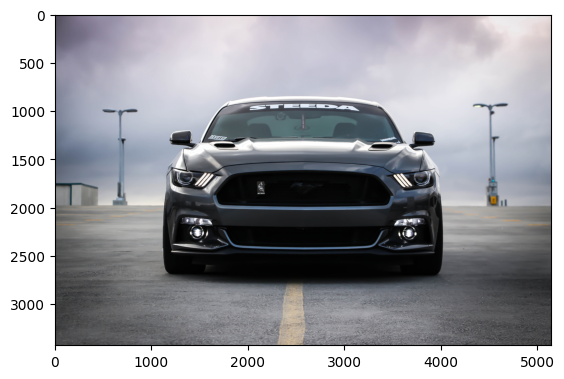

In [64]:
import matplotlib.pyplot as plt
plt.imshow(img)